## Import libraries and customize matplotlib styles params

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# https://matplotlib.org/stable/tutorials/introductory/customizing.html

%matplotlib widget

# set defaults
plt.rcParams.update(plt.rcParamsDefault)

SMALL_SIZE  = 11
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

# fonts
plt.rc('font',  size=SMALL_SIZE)
# title
plt.rc('axes',titlesize=BIGGER_SIZE)
plt.rc('axes',titleweight='bold')
# xy-labells
plt.rc('axes',labelsize=SMALL_SIZE)
# xy-ticks
plt.rc('xtick',labelsize=SMALL_SIZE)
plt.rc('ytick',labelsize=SMALL_SIZE)
# legend
plt.rc('legend',fontsize =SMALL_SIZE)
plt.rc('legend',framealpha=1)
plt.rc('legend',loc='upper left')
# lines
plt.rc('lines',linewidth=1.5)
# grid
plt.rc('axes' ,grid=True)

# pixel in inches
px2inch = 1/plt.rcParams['figure.dpi']

def plot_sets(ax,ti='',xla='',yla='',ba=1,xli=False,yli=False,leg=False):

    ax.set_title(ti)
    ax.set_xlabel(xla)
    ax.set_ylabel(yla)
    ax.set_box_aspect(ba)

    if xli: ax.set_xlim(xli)
    if yli: ax.set_ylim(yli)
    if leg: ax.legend()



In [109]:
def get_wavelet(t,f0,n_cycles):
    sigma        = n_cycles/(2*np.pi*f0)
    gaussian     = np.exp(-t**2/(2*sigma**2))
    complex_wave = np.exp(-2*np.pi*1j*f0*t)
    return complex_wave*gaussian  

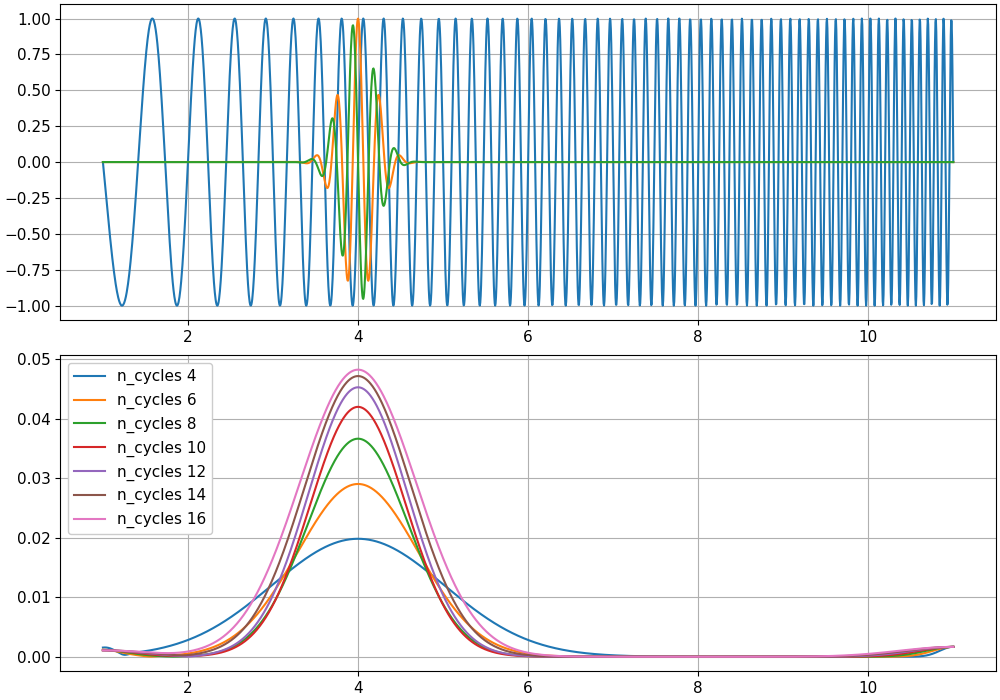

In [110]:

fig, ax = plt.subplots(2,1,constrained_layout=True,figsize=(1000*px2inch ,700*px2inch))

Nt       = 2000
t        = np.linspace(1,11,Nt)
f0       = 4
n_cycles = 5
wavelet  = get_wavelet(t-f0,f0,n_cycles)
signal   = np.sin(2*np.pi*(t**2/2))

ax[0].plot(t,signal)
ax[0].plot(t,np.real(wavelet))
ax[0].plot(t,np.imag(wavelet))

for n_cycles in range(4,18,2):
    power = []
    for tau in t:
        wavelet = get_wavelet(t-tau,f0,n_cycles)
        conv    = np.abs( sum(wavelet*signal) )/Nt
        power.append(conv)

    ax[1].plot(t,power,label=f'n_cycles {n_cycles}')

ax[1].legend()

plt.show()

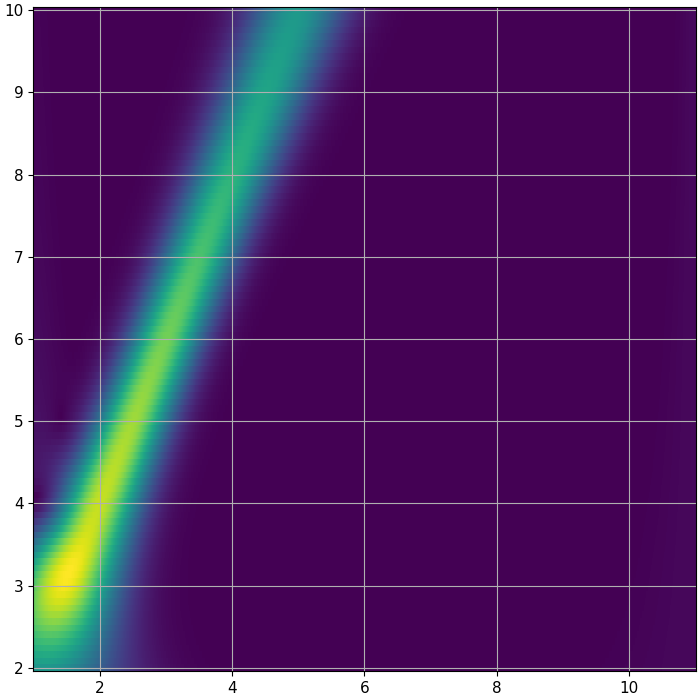

In [111]:
fig2, ax2 = plt.subplots(1,1,constrained_layout=True,figsize=(700*px2inch ,700*px2inch),sharex=True)
Nt       = 2000
t1       = 1
t2       = 11
t        = np.linspace(t1,t2,Nt)
f0       = 4
n_cycles = 5
wavelet  = get_wavelet(t-f0,f0,n_cycles)
signal   = np.sin(2*np.pi*(2*t**2/2))
n_cycles = 10

f_tau=np.linspace(2,10,100)

P = []
for fi in f_tau:
    power = []
    for tau in t:
        wavelet = get_wavelet(t-tau,fi,n_cycles)
        conv    = np.abs( sum(wavelet*signal) )/Nt
        power.append(conv)
    P.append(power)

P   = np.array(P)
X,Y = np.meshgrid(t,f_tau)
ax2.pcolormesh(X,Y,P)


plt.show()

In [231]:
def get_sin(x,n=100):
    s=np.zeros_like(x)
    for n in range(1,n+1): 
        s = s + np.sin(np.pi*x*n**2)/n**2
    return s

def get_sin_mat(x,n=100):
    n2  = np.arange(1,n+1).reshape(-1,1)**2
    x   = x.reshape(1,-1)
    mat = np.sin( np.pi*n2@x )/n2
    s   = np.sum(mat,axis=0)
    return s

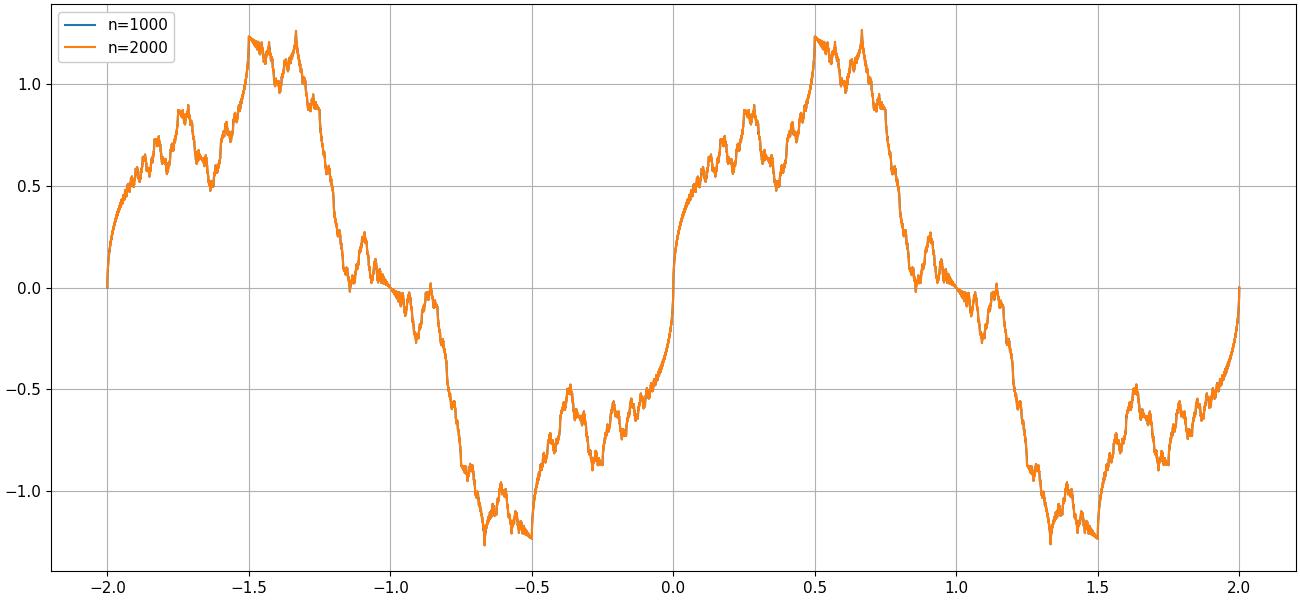

In [232]:

c  = 0
dx = 2
x  = np.linspace(c-dx,c+dx,100000)

fig3, ax3 = plt.subplots(1,1,constrained_layout=True,figsize=(1300*px2inch ,600*px2inch),sharex=True)

narray=[1000,2000]
for ni in narray:
    ax3.plot(x,get_sin(x,n=ni),label=f'n={ni}')
ax3.legend()

plt.show()

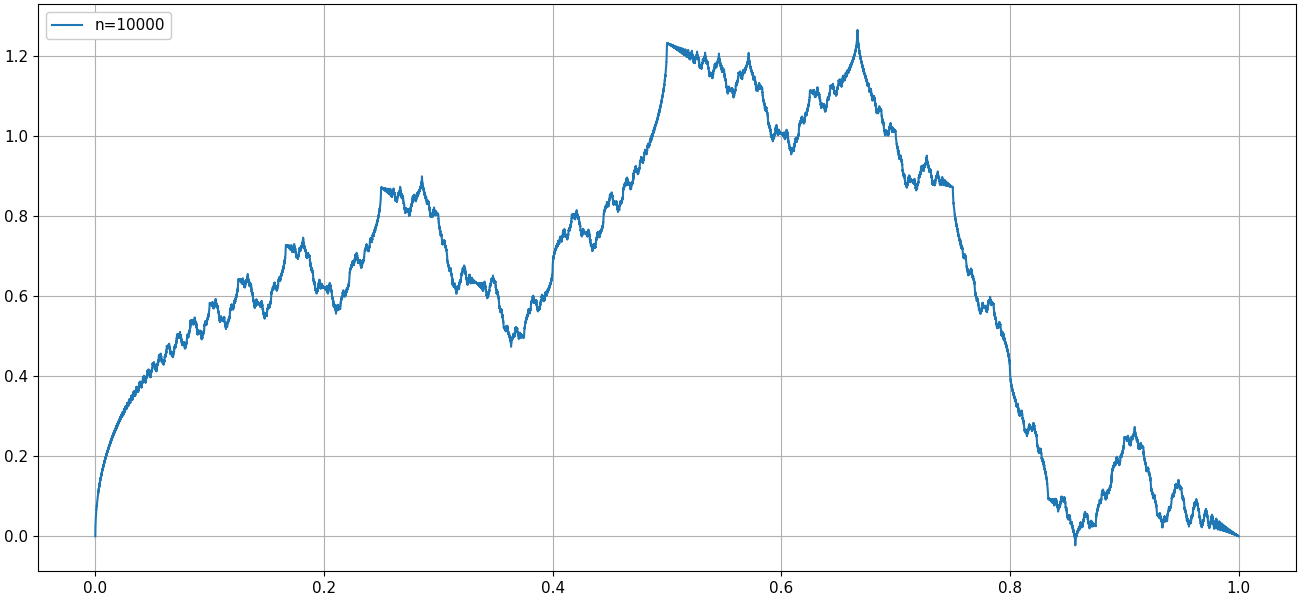

In [227]:

x  = np.linspace(0,1,1000000)

fig3, ax3 = plt.subplots(1,1,constrained_layout=True,figsize=(1300*px2inch ,600*px2inch),sharex=True)

narray=[10000]
for ni in narray:
    ax3.plot(x,get_sin(x,n=ni),label=f'n={ni}')
ax3.legend()

plt.show()

In [159]:
x=np.random.randn(5)
y=np.random.randn(5)

c=y*np.exp(1j*x)
r=y*np.cos(x)
i=y*np.sin(x)

print('x',x,'\n')
print('c',c,'\n')
print('r',r,'\n')
print('i',i,'\n')
print('i',np.abs(c),'\n')
print('i',np.sqrt(r**2+i**2),'\n')

x [ 0.0722596  -0.17031304  1.67544214  0.92893046 -0.4149235 ] 

c [ 1.46697543+0.10618794j -0.64758333+0.1113708j   0.05841262-0.55615455j
 -0.54246481-0.72575586j -0.11669951+0.05140583j] 

r [ 1.46697543 -0.64758333  0.05841262 -0.54246481 -0.11669951] 

i [ 0.10618794  0.1113708  -0.55615455 -0.72575586  0.05140583] 

i [1.47081365 0.65709027 0.55921366 0.90608478 0.12751994] 

i [1.47081365 0.65709027 0.55921366 0.90608478 0.12751994] 

